# Competição DSA de Machine Learning - Edição Janeiro/2019
## CRISP-DM: Data Understanding
**Autor:** Wanderson Marques - wdsmarques@gmail.com

Esse Jupyter Notebook contém uma **análise exploratória** dos dados. Considerando a metodologia CRISP-DM, essa atividade refere-se à segunda fase, o entendimento dos dados. 

<img src="imgs/dataUnderstanding.jpg" />

### Carregar bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
# Exibir gráficos dentro do Jupyter Notebook
% matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 17, 4

### Carregar dataset

O conjunto de dados é do Instituto Nacional de Diabetes e Doenças Digestivas e Renais (National Institute of Diabetes and Digestive and Kidney Diseases). O objetivo é prever com base em medidas de diagnóstico, se um paciente tem diabetes. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são do sexo feminino com pelo menos 21 anos de idade.

In [3]:
dataset = pd.read_csv('datasets/dataset_treino.csv')

# Eliminar o identificador dos pacientes
dataset.drop(['id'], axis=1, inplace=True)

dataset.head()

,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Entender os atributos

#### Descrição dos Campos:
**num_gestacoes** - Número de vezes grávida<br/>
**glicose** - Concentração plasmática de glicose em teste oral de tolerância à glicose (2 horas)<br/>
> - Normal: inferior a 140 mg/dl;
- Tolerância diminuída à glicose: entre 140 e 199 mg/dl; 
- Diabetes: igual ou superior a 200 mg/dl.

**pressao_sanguinea** - Pressão arterial diastólica em mm Hg<br/>
> - Pressão arterial normal: pressão sistólica menor que 120 mmHg e pressão diastólica menor que 80 mmHg;
- Pré-hipertensão: pressão sistólica entre 120 e 129 mmHg ou pressão diastólica menor que 80 mmHg;
- Hipertensão Estágio 1: pressão sistólica entre 130 e 139 mmHg ou pressão diastólica entre 80 e 89 mmHg;
- Hipertensão Estágio 2: pressão sistólica acima de 140 mmHg ou pressão diastólica acima de 90 mmHg;
- Crise Hipertensiva: pressão sistólica acima de 180 mmHg ou pressão diastólica acima de 110 mmHg;

**grossura_pele** - Espessura da dobra da pele do tríceps em mm<br/>
> -% de adequação da PCT: 
- < 70% Desnutrição grave
- ≥ 70 e < 80% Desnutrição moderada
- ≥ 80 e < 90 % Desnutrição leve
- ≥ 90 e < 110% Eutrofia
- ≥ 110 e <120% Sobrepeso
- ≥120% Obesidade

**insulina** - Insulina em mu U / ml (2 horas)<br/>
> - Normal: 16-166 mIU/L

**bmi** - Índice de massa corporal medido em peso em kg / (altura em m) ^ 2<br/>
> - < 16	Magreza grave
- 16 a < 17	Magreza moderada
- 17 a < 18,5	Magreza leve
- 18,5 a < 25	Saudável
- 25 a < 30	Sobrepeso
- 30 a < 35	Obesidade Grau I
- 35 a < 40	Obesidade Grau II (severa)
- \> 40	Obesidade Grau III (mórbida)

**indice_historico** - Índice de histórico de diabetes (Pedigree Function)<br/>
**idade** - Idade em anos<br/>
**classe** - Classe (0 - não desenvolveu a doença / 1 - desenvolveu a doença)<br/>


### Verificar tipos dos atributos

In [4]:
dataset.dtypes

num_gestacoes          int64
glicose                int64
pressao_sanguinea      int64
grossura_pele          int64
insulina               int64
bmi                  float64
indice_historico     float64
idade                  int64
classe                 int64
dtype: object

Todas as variáveis são quantitativas.

### Ver forma do dataset

In [5]:
dataset.shape

(600, 9)

In [6]:
# [0] = Quantidade de instâncias
# [1] = Quantidade de atributos
print("O dataset contém ", dataset.shape[0], "instâncias e ", dataset.shape[1], " atributos.")

O dataset contém  600 instâncias e  9  atributos.


### Observar amostra dos dados

In [7]:
# .sample() Mostra uma amostra aleatória
# .head() Mostra as primeiras instâncias
# .tail() Mostra as últimas instâncias
dataset.sample(10)

,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
487,0,173,78,32,265,46.5,1.159,58,0
453,2,119,0,0,0,19.6,0.832,72,0
560,6,125,76,0,0,33.8,0.121,54,1
384,1,125,70,24,110,24.3,0.221,25,0
207,5,162,104,0,0,37.7,0.151,52,1
94,2,142,82,18,64,24.7,0.761,21,0
105,1,126,56,29,152,28.7,0.801,21,0
178,5,143,78,0,0,45.0,0.190,47,0
395,2,127,58,24,275,27.7,1.600,25,0
248,9,124,70,33,402,35.4,0.282,34,0


### Descrever estatisticamente os dados

In [8]:
# Somente atributos numéricos são considerados
dataset.describe()

,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Por meio da análise de quartis, já pode-se perceber a presença de outliers em algumas variáveis. A tabela descritiva também trás outras informações relevantes, como os valores máximos, mínimos e desvio padrão para cada atributo.

Também pode ser percebido que existem registros com valor mínimo 0. Para algumas variáveis isso provavelmente significa um dado não informado, mesmo que o dataset não contenha valores nulos.

### Verificar presença de valores nulos

In [9]:
# Converter atributos zerados (fora de domínio) para nulo
naoZero = ['glicose', 'pressao_sanguinea', 'grossura_pele', 'insulina', 'bmi']
for coluna in naoZero:
    dataset.loc[dataset[coluna] == 0, coluna] = np.NaN

In [10]:
# Quantidade absoluta
totalNulos = (dataset.isnull()).sum()
totalNulos

num_gestacoes          0
glicose                5
pressao_sanguinea     28
grossura_pele        175
insulina             289
bmi                    9
indice_historico       0
idade                  0
classe                 0
dtype: int64

In [11]:
# Percentual
percentualNulos = (totalNulos / len(dataset)) * 100
percentualNulos

num_gestacoes         0.000000
glicose               0.833333
pressao_sanguinea     4.666667
grossura_pele        29.166667
insulina             48.166667
bmi                   1.500000
indice_historico      0.000000
idade                 0.000000
classe                0.000000
dtype: float64

### Separar atributos numéricos e categóricos

In [12]:
# Apenas atributos int e float
numericos = (dataset.select_dtypes(include=['int64', 'float64'])).columns

# Não considerar a classe entre os atributos numéricos
numericos = numericos.drop(['classe'])

In [13]:
# Apenas atributos object (string)
categoricos = (dataset.select_dtypes(include=['object'])).columns

Inicialmente não existe no dataset atributos categóricos

### Visualizar presença de outliers  (atributos numéricos)

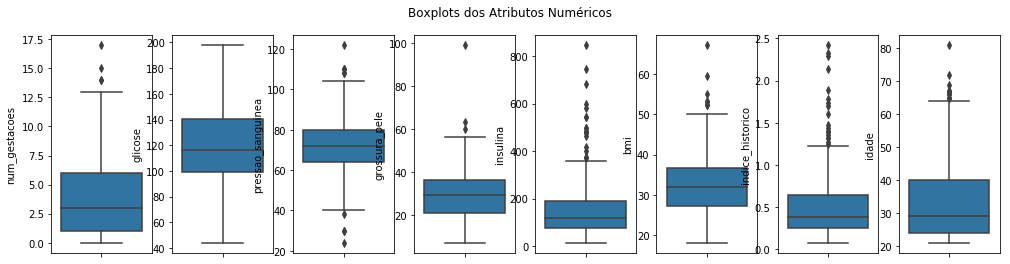

In [14]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Boxplots dos Atributos Numéricos")

# Gráfico para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    sns.boxplot(dataset[feature], ax=ax[i], orient='vertical')

Como descrito anteriormente, os boxplot deixam mais claro a existência de outliers para algumas das variáveis.

### Visualizar distribuição dos dados (atributos numéricos)

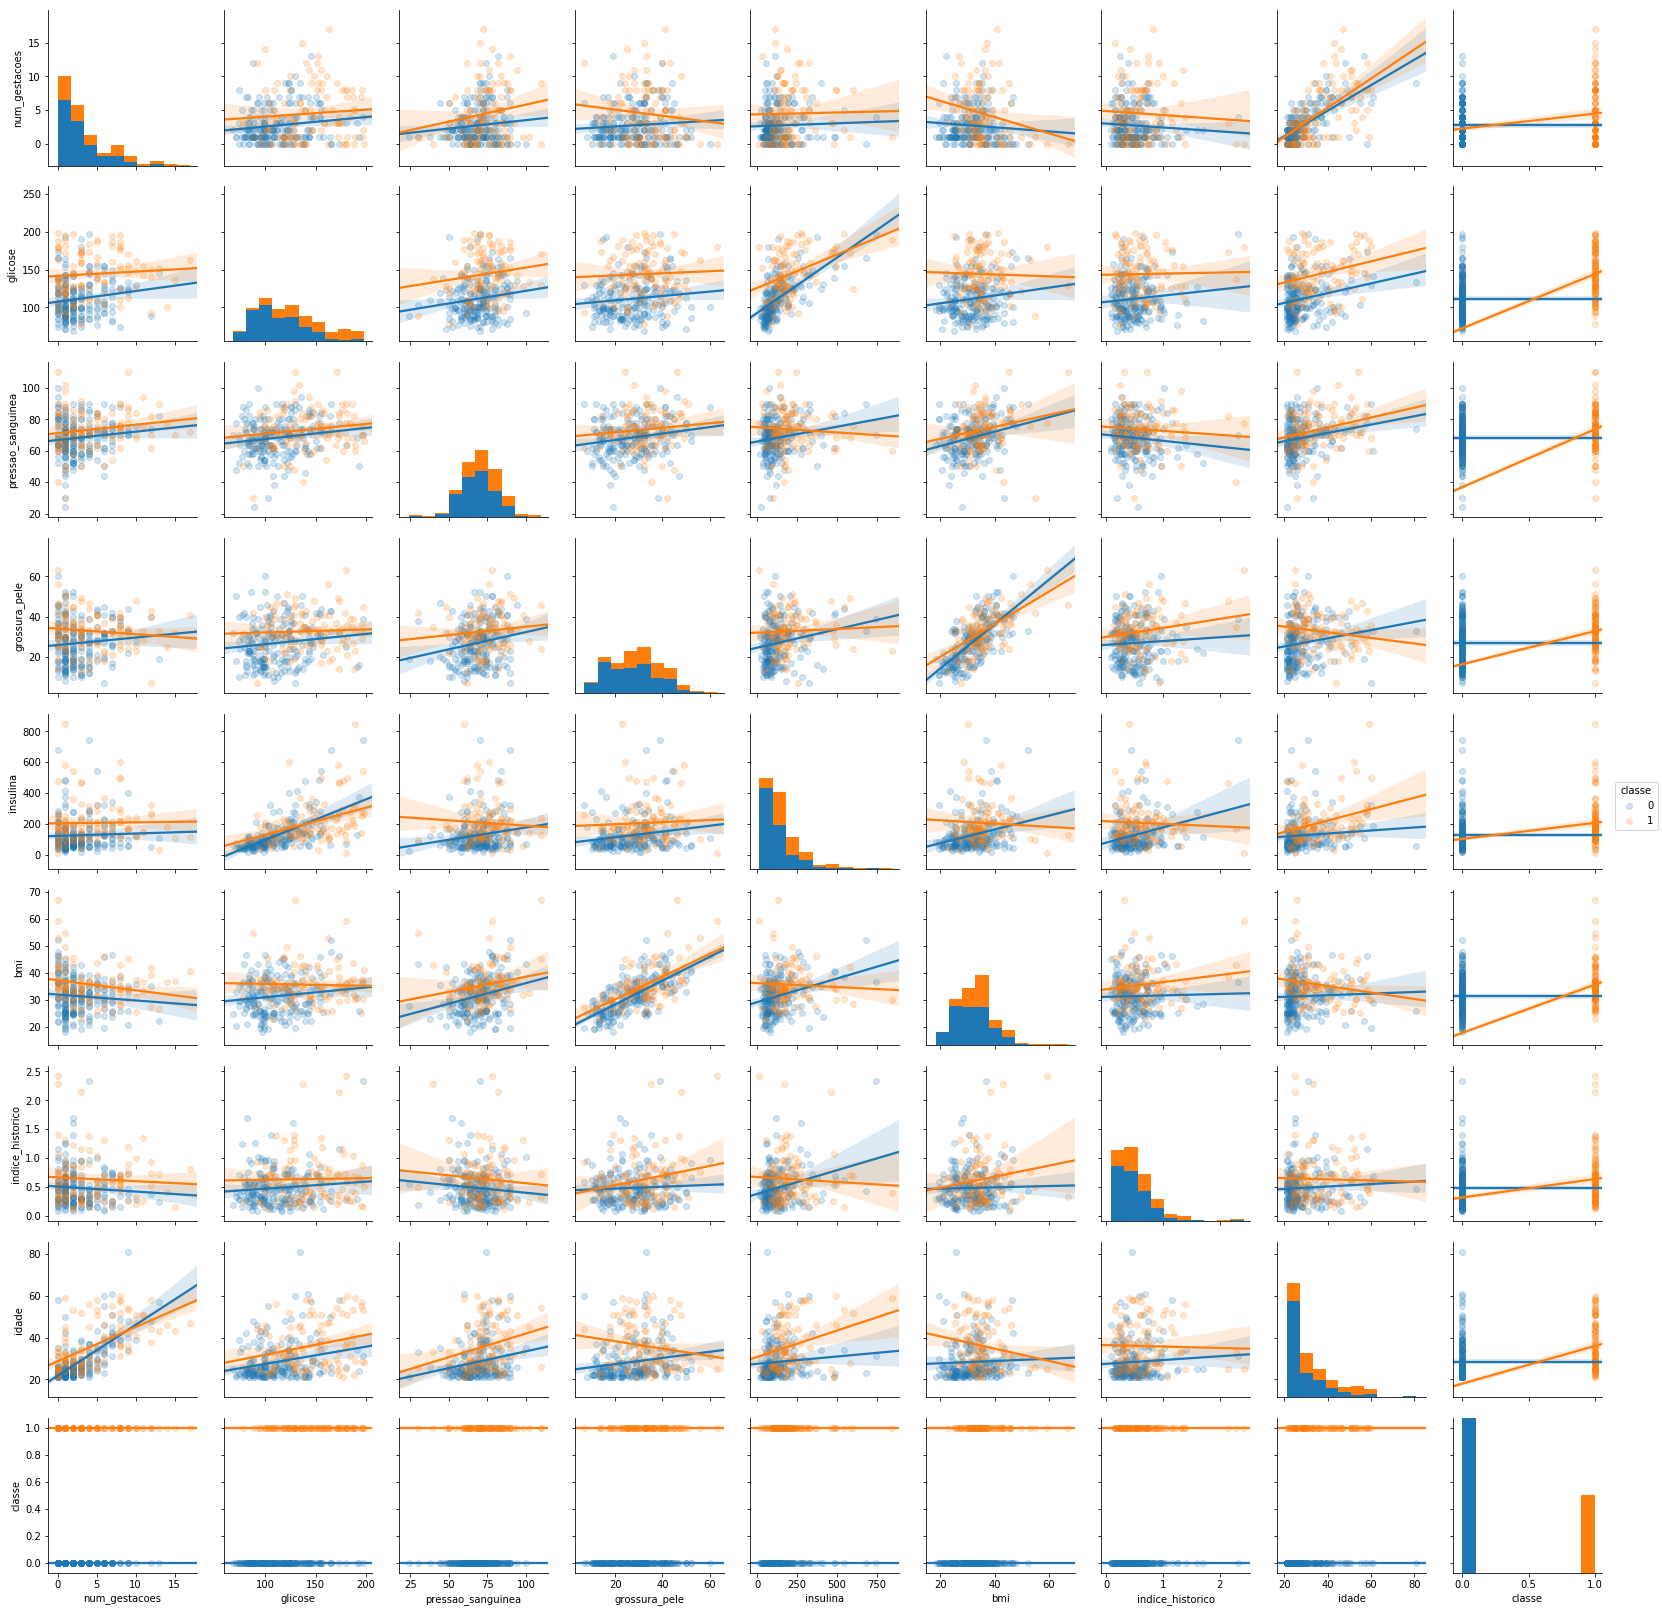

In [15]:
# Obrigatório instâncias com algum valor nulo
sns.pairplot(dataset.dropna(), hue='classe', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.2}, 'fit_reg': True})

Ao analisar os gráficos acima, pode-se perceber:
- As classes (0 ou 1) estão desbalanceadas
- Algumas das variáveis parecem estar linearmente correlacionadas
- Os gráficos de dispersão não diferenciam muito bem os indivíduos de cada classe. Isso pode indicar a necessidade de um grande esforço em feature engineering 

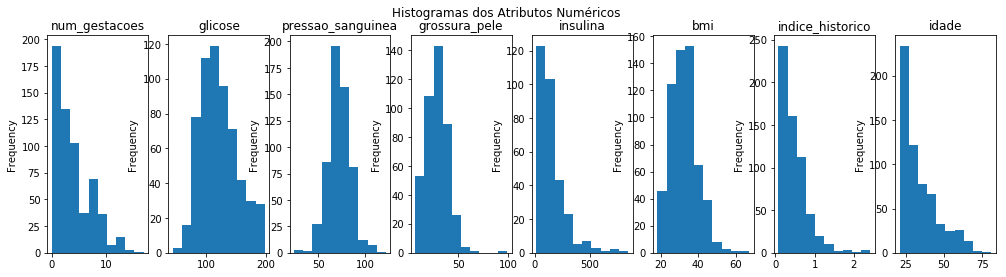

In [16]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Histogramas dos Atributos Numéricos")

# Histograma para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    ax[i].set_title(feature)
    dataset[feature].plot(kind='hist', ax=ax[i])

### Visualizar distribuição dos dados (atributos categóricos)

In [17]:
fig, ax = plt.subplots(ncols=len(categoricos), nrows=1)
plt.suptitle("Gráficos de Barra dos Atributos Categóricos")

# Gráfico para cada atributo categórico
for i in range(0, len(categoricos)):
    feature = categoricos[i]
    ax[i].set_title(feature)
    dataset[feature].value_counts().plot(kind='bar', ax=ax[i])

Não existem no dataset atributos categóricos, por isso nenhum gráfico é plotado

### Visualizar dados em 2D

In [18]:
# Reduzir dados para 2 dimensões com Análise de Componentes Principais (PCA)
pca = PCA(2)

datasetPCA = pca.fit_transform((dataset.dropna()))
datasetPCA = pd.DataFrame({'pc1': datasetPCA[:, 0], 'pc2': datasetPCA[:, 1], 'class': dataset.dropna()['classe'] })

datasetPCA.head()

,class,pc1,pc2
3,0,-64.866155,-24.981814
4,1,15.918659,9.357457
6,1,-72.382042,-35.325109
8,1,396.357925,15.037687
13,1,693.922771,-42.249472


In [19]:
# Verificar a variância explicada por cada componente
total =  np.cumsum(pca.explained_variance_ratio_)[1]
pca.explained_variance_ratio_

array([0.93642061, 0.03916323])

In [20]:
print("Os 2 componentes principais criados pelo PCA conseguem explicar", total * 100, "% da variância das variáveis numéricas.")

Os 2 componentes principais criados pelo PCA conseguem explicar 97.55838421953685 % da variância das variáveis numéricas.


In [21]:
dataset.shape

(600, 9)

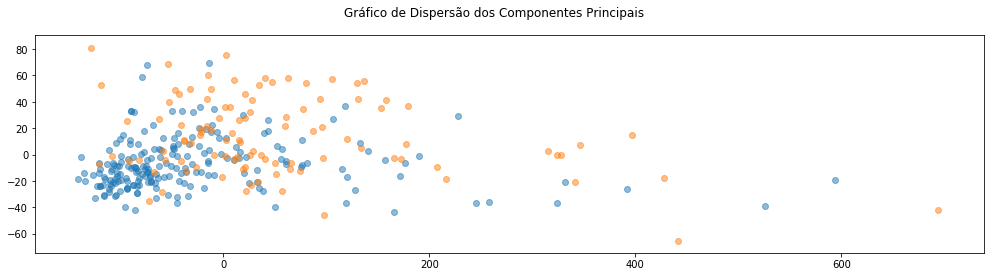

In [22]:
# Mostrar o gráfico de dispersão dos 2 componentes
plt.suptitle("Gráfico de Dispersão dos Componentes Principais")
plt.scatter(x=datasetPCA[datasetPCA['class'] == 0]['pc1'], y=datasetPCA[datasetPCA['class'] == 0]['pc2'], alpha=0.5)
plt.scatter(x=datasetPCA[datasetPCA['class'] == 1]['pc1'], y=datasetPCA[datasetPCA['class'] == 1]['pc2'], alpha=0.5)

### Calcular correlações

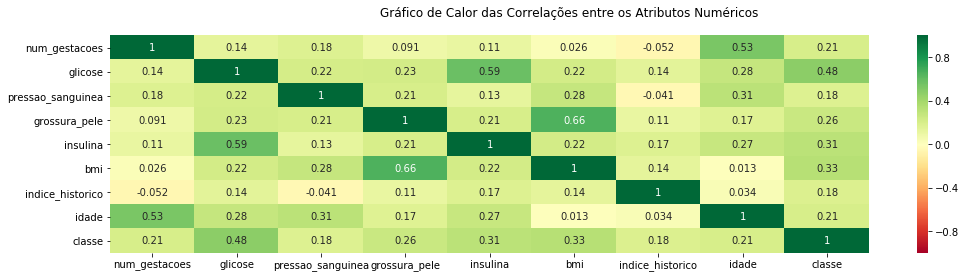

In [23]:
# Somente atributos numéricos são considerados
plt.suptitle("Gráfico de Calor das Correlações entre os Atributos Numéricos")
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

O gráfico de calor mostra que as variáveis mais correlacionadas são:
- numgestacoes e idade (positivamente)
- glicose e insulina (positivamente)
- grossura_pele e bmi (positivamente)